In [1]:
# standard ds imports
import numpy as np
import pandas as pd

# for wrangling and exploration
import acquire
import prepare
import explore

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for statistical analysis
import scipy.stats as stats

# for model evaluation
import sklearn.metrics as met
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

# DECISION TREE

### Titanic Dataset:

In [2]:
titanic = acquire.get_titanic_data()
titanic = prepare.prep_titanic(titanic)
train, val, test = prepare.split_data(titanic, 'survived')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             534 non-null    int64  
 1   survived                 534 non-null    int64  
 2   pclass                   534 non-null    int64  
 3   sibsp                    534 non-null    int64  
 4   parch                    534 non-null    int64  
 5   fare                     534 non-null    float64
 6   alone                    534 non-null    int64  
 7   sex_male                 534 non-null    uint8  
 8   embark_town_Queenstown   534 non-null    uint8  
 9   embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 34.9 KB


#### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [3]:
# baseline is 100% not surviving due to it being the mode for the survived feature
baseline = train.survived.mode()
baseline_train = baseline.tolist()*train.shape[0]
baseline_val = baseline.tolist()*val.shape[0]
baseline_test = baseline.tolist()*test.shape[0]

In [4]:
pd.DataFrame(met.classification_report(train.survived, baseline_train, output_dict=True))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.616105,0.0,0.616105,0.308052,0.379585
recall,1.000000,0.0,0.616105,0.500000,0.616105
f1-score,0.762457,0.0,0.616105,0.381228,0.469753
support,329.000000,205.0,0.616105,534.000000,534.000000


#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [5]:
y_train = train.survived
X_train = train.drop(columns=['survived', 'passenger_id'])
X_train.shape, y_train.shape

((534, 8), (534,))

In [6]:
X_val = val.drop(columns=['survived','passenger_id'])
y_val = val.survived
X_test = test.drop(columns=['survived','passenger_id'])
y_test = test.survived

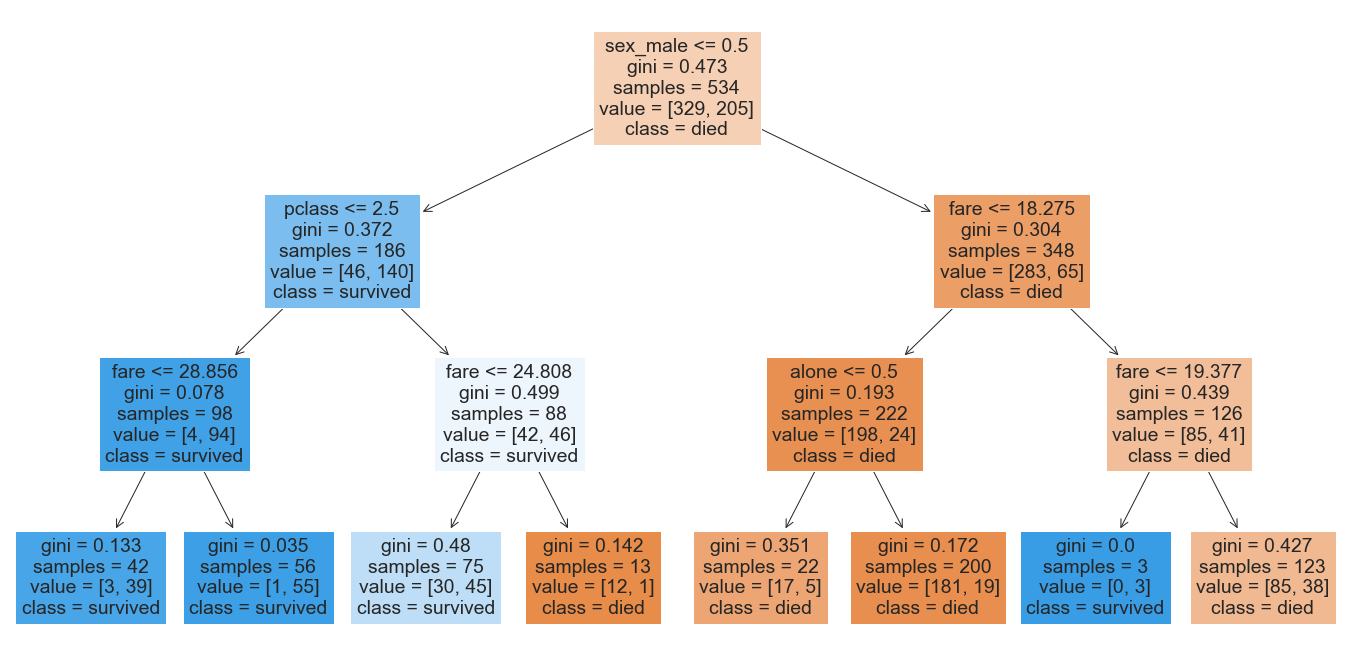

In [7]:
model1 = DecisionTreeClassifier(max_depth=3)
model1.fit(X_train, y_train)
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=X_train.columns.to_list(), class_names=['died','survived'], rounded=False, filled=True)
plt.show()

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [8]:
print(f'training score: {model1.score(X_train, y_train):.2%}')

training score: 81.84%


In [9]:
cm = met.confusion_matrix(train.survived, model1.predict(X_train))
cm

array([[295,  34],
       [ 63, 142]])

In [10]:
rubric = pd.DataFrame({
    'pred_death' : ['True Neg', 'False Neg'], 
    'pred_survive' : ['False Pos', 'True Pos']
    }, index=['actual_death', 'actual_survive'])

rubric

,pred_death,pred_survive
actual_death,True Neg,False Pos
actual_survive,False Neg,True Pos


In [11]:
rubric + ': ' + cm.astype(str)

,pred_death,pred_survive
actual_death,True Neg: 295,False Pos: 34
actual_survive,False Neg: 63,True Pos: 142


In [12]:
pd.DataFrame(met.classification_report(train.survived, model1.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.824022,0.806818,0.818352,0.815420,0.817418
recall,0.896657,0.692683,0.818352,0.794670,0.818352
f1-score,0.858806,0.745407,0.818352,0.802107,0.815273
support,329.000000,205.000000,0.818352,534.000000,534.000000


#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [13]:
TP = cm[1,1]
FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]

print(f'accuracy: {(TP+TN)/(TP+FP+FN+TN):.2%}')
print(f'true positive rate / recall: {TP/(TP+FN):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate: {FP / (FP + TN):.2%}')
print(f'false negative rate: {(FN)/(TN+FN):.2%}')
print(f'Percision: {TP/(TP+FP):.2%}')
print(f'f1-score: {met.f1_score(train.survived, model1.predict(X_train)):.2%}')
print(f'support pos: {TP + FN}')
print(f'support neg: {FP + TN}')

accuracy: 81.84%
true positive rate / recall: 69.27%
true negative rate / Specificity: 89.67%
false potivie rate: 10.33%
false negative rate: 17.60%
Percision: 80.68%
f1-score: 74.54%
support pos: 205
support neg: 329


In [111]:
# ON THE WAY TO MAKE IT MORE MODULAR
def binary_decisiontree_data(train, X_train, y_train, target):
    '''
    ONLY FOR A BINARY TARGET. 
    
    This function takes in:
        train = train dataset as DataFrame
        X_train = train dataset minus target series as DataFrame
        y_train = target variable column as a series
        target = target variable as a string
        
    Returns a DataFrame running decision tree models from 2 to 7 depth with confusion matrix data.
    '''
    models = {}
    z = 1
    for i in range(2,8):
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train, y_train)

        cm = met.confusion_matrix(train[target], model.predict(X_train))
        TP = cm[1,1]
        FP = cm[0,1]
        TN = cm[0,0]
        FN = cm[1,0]

        acc = round(((TP+TN)/(TP+FP+FN+TN))*100,2)
        TPR = round((TP/(TP+FN))*100,2)
        TNR = round(((TN)/(FP+TN))*100,2)
        FPR = round((FP / (FP + TN))*100,2)
        FNR = round(((FN)/(TN+FN))*100,2)
        percision = round((TP/(TP+FP))*100,2)
        f1 = round((met.f1_score(train[target], model1.predict(X_train)))*100,2)
        sp = TP + FN
        sn = FP + TN

        model_name = 'model '+str(z)
        models[model_name] = {'Accuracy' : acc.astype(str)+'%', 
                         'Recall TPR': TPR.astype(str)+'%', 
                         'Specificity TNR': TNR.astype(str)+'%', 
                         'FPR': FPR.astype(str)+'%', 
                         'FNR': FNR.astype(str)+'%', 
                         'Percision': percision.astype(str)+'%',
                         'F1-score': f1.astype(str)+'%',
                         'Support pos': sp,
                         'Support neg': sn}
        z+=1
    return pd.DataFrame(models).T

In [112]:
binary_decisiontree_data(train, X_train, y_train, 'survived')

,Accuracy,Recall TPR,Specificity TNR,FPR,FNR,Percision,F1-score,Support pos,Support neg
model 1,79.21%,68.29%,86.02%,13.98%,18.68%,75.27%,74.54%,205,329
model 2,81.84%,69.27%,89.67%,10.33%,17.6%,80.68%,74.54%,205,329
model 3,82.02%,69.27%,89.97%,10.03%,17.55%,81.14%,74.54%,205,329
model 4,83.33%,60.0%,97.87%,2.13%,20.3%,94.62%,74.54%,205,329
model 5,85.96%,67.32%,97.57%,2.43%,17.27%,94.52%,74.54%,205,329
model 6,86.33%,67.8%,97.87%,2.13%,17.01%,95.21%,74.54%,205,329


#### 5. Run through steps 2-4 using a different max_depth value.

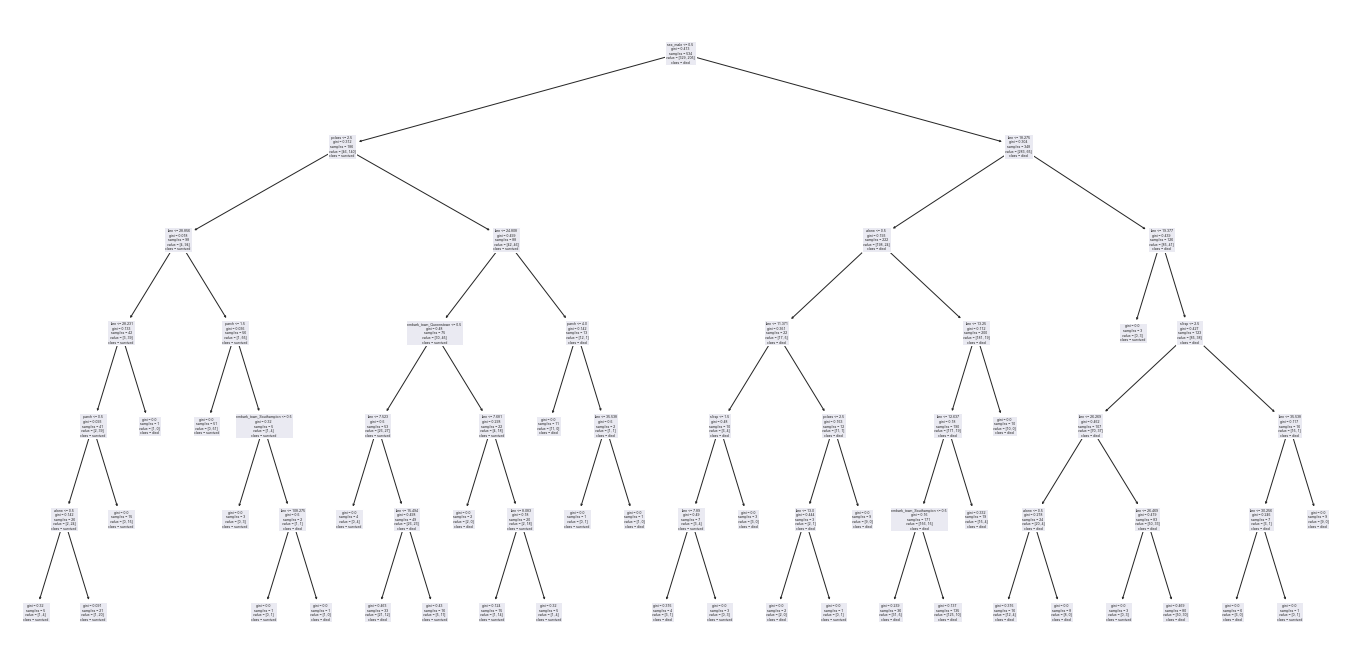

In [113]:
model2 = DecisionTreeClassifier(max_depth=6)
model2.fit(X_train, y_train)
plt.figure(figsize=(24,12))
plot_tree(model2, feature_names=X_train.columns.to_list(), class_names=['died','survived'])
plt.show()

In [114]:
print(f'training score: {model2.score(X_train, y_train):.2%}')

training score: 85.96%


In [115]:
pd.DataFrame(met.classification_report(train.survived, model2.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.829016,0.939189,0.859551,0.884102,0.871311
recall,0.972644,0.678049,0.859551,0.825347,0.859551
f1-score,0.895105,0.787535,0.859551,0.841320,0.853809
support,329.000000,205.000000,0.859551,534.000000,534.000000


In [116]:
TP = ((train.survived == 1) & (model2.predict(X_train) == 1)).sum()
FP = ((train.survived == 0) & (model2.predict(X_train) == 1)).sum()
TN = ((train.survived == 0) & (model2.predict(X_train) == 0)).sum()
FN = ((train.survived == 1) & (model2.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.survived, model2.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, model2.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, model2.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, model2.predict(X_train)):.2%}')
print(f'support: {model2.predict(X_train).sum()}')

accuracy: 85.96%
true positive rate / recall: 67.80%
true negative rate / Specificity: 97.26%
false potivie rate / Percision: 93.92%
false negative rate: 82.90%
f1-score: 78.75%
support: 148


#### 6. Which model performs better on your in-sample data?

In [117]:
print(f'Model 1 Accuracy: {met.accuracy_score(train.survived, model1.predict(X_train)):.2%}')
print(f'Model 2 Accuracy: {met.accuracy_score(train.survived, model2.predict(X_train)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(train.survived, baseline_train):.2%}')

Model 1 Accuracy: 81.84%
Model 2 Accuracy: 85.96%
Baseline Accuracy: 61.61%


In [118]:
# Model 2 performs better on the train dataset

#### 7. Which model performs best on your out-of-sample data, the validate set?

In [119]:
print(f'Model 1 Accuracy: {met.accuracy_score(val.survived, model1.predict(X_val)):.2%}')
print(f'Model 2 Accuracy: {met.accuracy_score(val.survived, model2.predict(X_val)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(val.survived, baseline_val):.2%}')

Model 1 Accuracy: 79.21%
Model 2 Accuracy: 78.09%
Baseline Accuracy: 61.80%


In [120]:
# Model 1 perfoms better on the validate dataset

<AxesSubplot:ylabel='Feature Importance'>

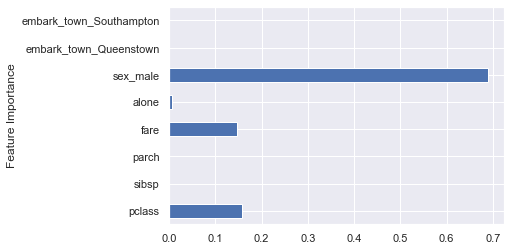

In [121]:
pd.Series(dict(zip(X_train.columns, model1.feature_importances_))).plot.barh(xlabel='Feature Importance')

<AxesSubplot:ylabel='Feature Importance'>

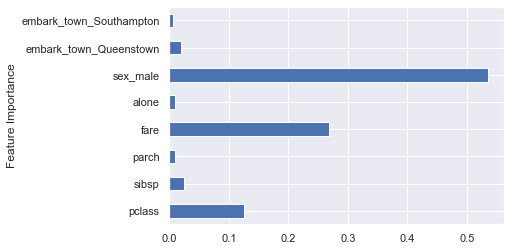

In [122]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_))).plot.barh(xlabel='Feature Importance')

In [123]:
# Gender, fare, and class are the top 3 features when determining survival

### Telco Dataset:

In [124]:
telco = acquire.get_telco_data()
telco = prepare.prep_telco(telco)
train, val, test = prepare.split_data(telco, 'churn_Yes')

#### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [125]:
baseline = train.churn_Yes.mode()
baseline_train = baseline.tolist()*train.shape[0]
baseline_val = baseline.tolist()*val.shape[0]
baseline_test = baseline.tolist()*test.shape[0]
pd.DataFrame(met.classification_report(train.churn_Yes, baseline_train, output_dict=True))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.734675,0.0,0.734675,0.367337,0.539747
recall,1.000000,0.0,0.734675,0.500000,0.734675
f1-score,0.847046,0.0,0.734675,0.423523,0.622303
support,3104.000000,1121.0,0.734675,4225.000000,4225.000000


#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [126]:
X_train = train.drop(columns=['churn_Yes', 'customer_id'])
y_train = train.churn_Yes
X_val = val.drop(columns=['churn_Yes', 'customer_id'])
y_val = val.churn_Yes
X_test = test.drop(columns=['churn_Yes', 'customer_id'])
y_test = test.churn_Yes

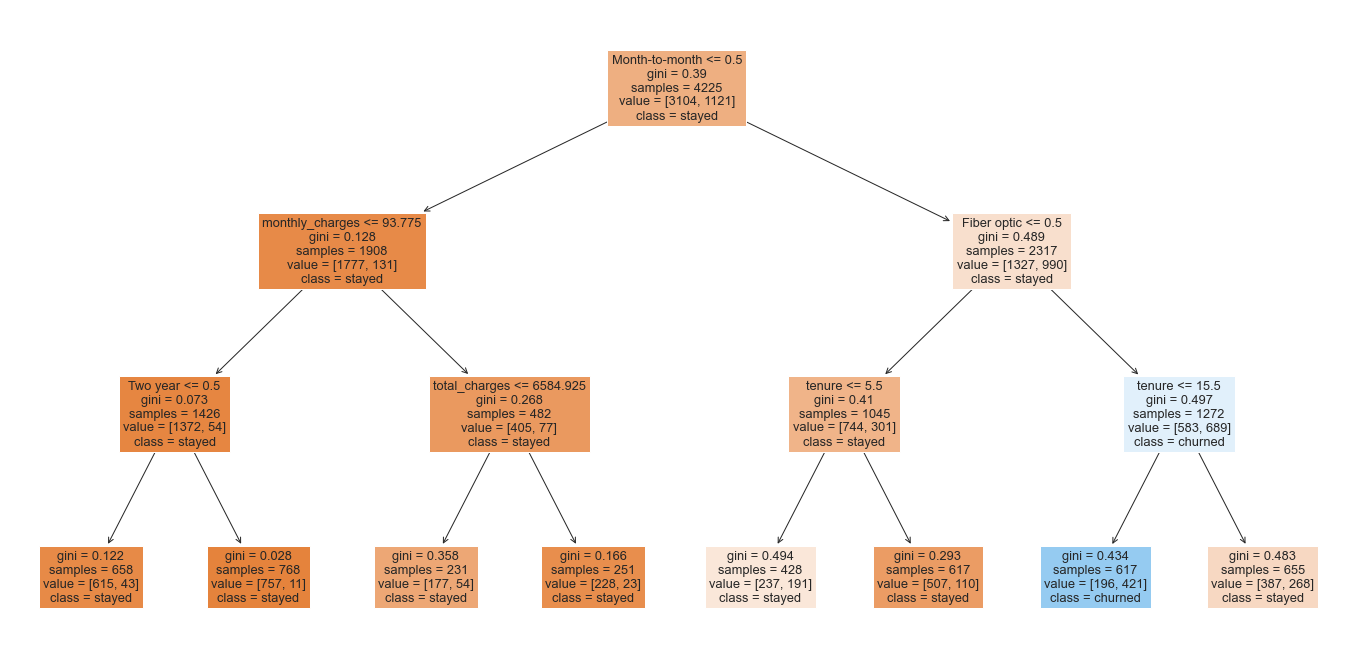

In [127]:
model1 = DecisionTreeClassifier(max_depth=3)
model1.fit(X_train, y_train)
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=X_train.columns.to_list(), class_names=['stayed','churned'], filled=True)
plt.show()

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [128]:
model1.score(X_train, y_train)

0.7879289940828402

In [129]:
pd.DataFrame(met.classification_report(train.churn_Yes, model1.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.805987,0.682334,0.787929,0.744160,0.773178
recall,0.936856,0.375558,0.787929,0.656207,0.787929
f1-score,0.866508,0.484465,0.787929,0.675486,0.765142
support,3104.000000,1121.000000,0.787929,4225.000000,4225.000000


#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [130]:
TP = ((train.churn_Yes == 1) & (model1.predict(X_train) == 1)).sum()
FP = ((train.churn_Yes == 0) & (model1.predict(X_train) == 1)).sum()
TN = ((train.churn_Yes == 0) & (model1.predict(X_train) == 0)).sum()
FN = ((train.churn_Yes == 1) & (model1.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'support: {model1.predict(X_train).sum()}')

accuracy: 78.79%
true positive rate / recall: 37.56%
true negative rate / Specificity: 93.69%
false potivie rate / Percision: 68.23%
false negative rate: 80.60%
f1-score: 48.45%
support: 617


#### 5. Run through steps 2-4 using a different max_depth value.

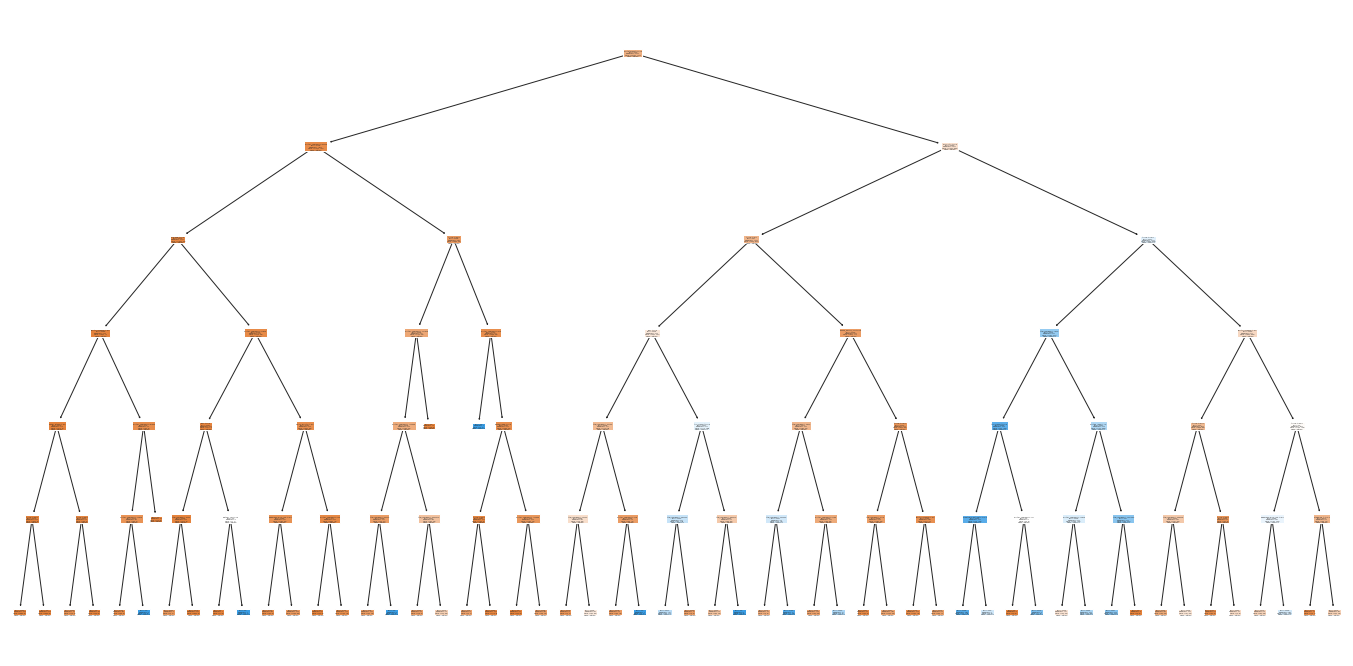

In [174]:
model2 = DecisionTreeClassifier(max_depth=6)
model2.fit(X_train, y_train)
plt.figure(figsize=(24,12))
plot_tree(model2, feature_names=X_train.columns.to_list(), class_names=['stayed','churned'], filled=True)
plt.show()

In [175]:
pd.DataFrame(met.classification_report(train.churn_Yes, model2.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.856177,0.672503,0.813964,0.764340,0.807444
recall,0.897552,0.582516,0.813964,0.740034,0.813964
f1-score,0.876376,0.624283,0.813964,0.750330,0.809489
support,3104.000000,1121.000000,0.813964,4225.000000,4225.000000


In [176]:
TP = ((train.churn_Yes == 1) & (model1.predict(X_train) == 1)).sum()
FP = ((train.churn_Yes == 0) & (model1.predict(X_train) == 1)).sum()
TN = ((train.churn_Yes == 0) & (model1.predict(X_train) == 0)).sum()
FN = ((train.churn_Yes == 1) & (model1.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'support: {model1.predict(X_train).sum()}')

accuracy: 78.79%
true positive rate / recall: 37.56%
true negative rate / Specificity: 93.69%
false potivie rate / Percision: 68.23%
false negative rate: 80.60%
f1-score: 48.45%
support: 617


#### 6. Which model performs better on your in-sample data?

In [177]:
print(f'Model 1 Accuracy: {met.accuracy_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'Model 2 Accuracy: {met.accuracy_score(train.churn_Yes, model2.predict(X_train)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(train.churn_Yes, baseline_train):.2%}')

Model 1 Accuracy: 78.79%
Model 2 Accuracy: 81.40%
Baseline Accuracy: 73.47%


In [178]:
# Model 2 performs better with train dataset

#### 7. Which model performs best on your out-of-sample data, the validate set?

In [179]:
print(f'Model 1 Accuracy: {met.accuracy_score(val.churn_Yes, model1.predict(X_val)):.2%}')
print(f'Model 2 Accuracy: {met.accuracy_score(val.churn_Yes, model2.predict(X_val)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(val.churn_Yes, baseline_val):.2%}')

Model 1 Accuracy: 79.28%
Model 2 Accuracy: 79.77%
Baseline Accuracy: 73.46%


In [180]:
# Model 2 performs better with validate dataset

<AxesSubplot:ylabel='Feature Importance'>

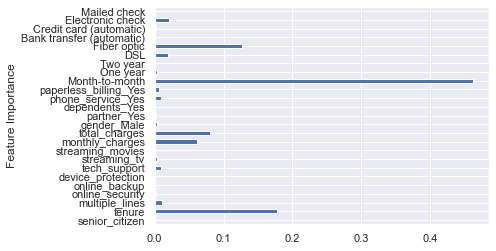

In [187]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_))).plot.barh(xlabel='Feature Importance')

In [188]:
# Fiber optic, month-to-month contracts, and tenure are the top 3 features when determining churn

# RANDOM FOREST

#### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [27]:
rf1 = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=123)
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [33]:
rf1.score(X_train, y_train)

0.9438202247191011

In [40]:
pd.DataFrame(met.classification_report(train.survived, rf1.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.928367,0.972973,0.94382,0.950670,0.945491
recall,0.984802,0.878049,0.94382,0.931426,0.943820
f1-score,0.955752,0.923077,0.94382,0.939415,0.943208
support,329.000000,205.000000,0.94382,534.000000,534.000000


In [41]:
met.confusion_matrix(train.survived, rf1.predict(X_train))

array([[324,   5],
       [ 25, 180]])

#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [42]:
cm = met.confusion_matrix(train['survived'], rf1.predict(X_train))
TP = cm[1,1]
FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]
acc = round(((TP+TN)/(TP+FP+FN+TN))*100,2)
TPR = round((TP/(TP+FN))*100,2)
TNR = round(((TN)/(FP+TN))*100,2)
FPR = round((FP / (FP + TN))*100,2)
FNR = round(((FN)/(TN+FN))*100,2)
percision = round((TP/(TP+FP))*100,2)
f1 = round((met.f1_score(train['survived'], rf1.predict(X_train)))*100,2)
sp = TP + FN
sn = FP + TN
models = {}
models['rf1'] = {'Accuracy' : acc.astype(str)+'%', 
                 'Recall TPR': TPR.astype(str)+'%', 
                 'Specificity TNR': TNR.astype(str)+'%', 
                 'FPR': FPR.astype(str)+'%', 
                 'FNR': FNR.astype(str)+'%', 
                 'Percision': percision.astype(str)+'%',
                 'F1-score': f1.astype(str)+'%',
                 'Support pos': sp,
                 'Support neg': sn}

In [43]:
pd.DataFrame(models)

,rf1
Accuracy,94.38%
F1-score,92.31%
FNR,7.16%
FPR,1.52%
Percision,97.3%
Recall TPR,87.8%
Specificity TNR,98.48%
Support neg,329
Support pos,205


#### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [97]:
def binary_randomforest_data(train, X_train, y_train, target):
    '''
    ONLY FOR A BINARY TARGET. 
    
    This function takes in:
        train = train dataset as DataFrame
        X_train = train dataset minus target series as DataFrame
        y_train = target variable column as a series
        target = target variable as a string
        
    Returns a DataFrame running random forest models with confusion matrix data
    from 2 to 9 depth and 1 to 4 min sample leaf.
    '''
    models = {}
    z = 1
    for i in range(2,10):
        for x in range(1,5):
            model = RandomForestClassifier(max_depth=i, min_samples_leaf=x, random_state=123)
            model.fit(X_train, y_train)
    
            cm = met.confusion_matrix(train[target], model.predict(X_train))
            TP = cm[1,1]
            FP = cm[0,1]
            TN = cm[0,0]
            FN = cm[1,0]
    
            acc = round(((TP+TN)/(TP+FP+FN+TN))*100,2)
            TPR = round((TP/(TP+FN))*100,2)
            TNR = round(((TN)/(FP+TN))*100,2)
            FPR = round((FP / (FP + TN))*100,2)
            FNR = round(((FN)/(TN+FN))*100,2)
            percision = round((TP/(TP+FP))*100,2)
            f1 = round((met.f1_score(train[target], model1.predict(X_train)))*100,2)
            sp = TP + FN
            sn = FP + TN
            
            model_name = 'model' + str(z)
            models[model_name] = {'Max Depth' : i,
                         'Min Samples Leaf' : x,
                         'Accuracy' : acc.astype(str)+'%', 
                         'Recall TPR': TPR.astype(str)+'%', 
                         'Specificity TNR': TNR.astype(str)+'%', 
                         'FPR': FPR.astype(str)+'%', 
                         'FNR': FNR.astype(str)+'%', 
                         'Percision': percision.astype(str)+'%',
                         'F1-score': f1.astype(str)+'%',
                         'Support pos': sp,
                         'Support neg': sn}
            z += 1
    return pd.DataFrame(models).T

In [98]:
# Different depths

In [99]:
rf_train_data = binary_randomforest_data(train, X_train, y_train, 'survived')

#### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [100]:
rf_train_data

,Max Depth,Min Samples Leaf,Accuracy,Recall TPR,Specificity TNR,FPR,FNR,Percision,F1-score,Support pos,Support neg
model1,2,1,79.4%,52.2%,96.35%,3.65%,23.61%,89.92%,74.54%,205,329
model2,2,2,79.4%,52.2%,96.35%,3.65%,23.61%,89.92%,74.54%,205,329
model3,2,3,79.4%,52.2%,96.35%,3.65%,23.61%,89.92%,74.54%,205,329
model4,2,4,79.4%,52.2%,96.35%,3.65%,23.61%,89.92%,74.54%,205,329
model5,3,1,82.4%,65.85%,92.71%,7.29%,18.67%,84.91%,74.54%,205,329
model6,3,2,82.21%,65.85%,92.4%,7.6%,18.72%,84.38%,74.54%,205,329
model7,3,3,82.4%,65.85%,92.71%,7.29%,18.67%,84.91%,74.54%,205,329
model8,3,4,82.02%,65.85%,92.1%,7.9%,18.77%,83.85%,74.54%,205,329
model9,4,1,84.64%,68.29%,94.83%,5.17%,17.24%,89.17%,74.54%,205,329
model10,4,2,83.9%,66.34%,94.83%,5.17%,18.11%,88.89%,74.54%,205,329


In [101]:
rf_train_data[rf_train_data.Accuracy == rf_train_data.Accuracy.max()]

,Max Depth,Min Samples Leaf,Accuracy,Recall TPR,Specificity TNR,FPR,FNR,Percision,F1-score,Support pos,Support neg
model29,9,1,94.01%,86.83%,98.48%,1.52%,7.69%,97.27%,74.54%,205,329


#### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [102]:
rf_train_data[rf_train_data['Recall TPR'] == rf_train_data['Recall TPR'].max()]

,Max Depth,Min Samples Leaf,Accuracy,Recall TPR,Specificity TNR,FPR,FNR,Percision,F1-score,Support pos,Support neg
model29,9,1,94.01%,86.83%,98.48%,1.52%,7.69%,97.27%,74.54%,205,329


In [103]:
rf_train_data[rf_train_data['Specificity TNR'] == rf_train_data['Specificity TNR'].max()]

,Max Depth,Min Samples Leaf,Accuracy,Recall TPR,Specificity TNR,FPR,FNR,Percision,F1-score,Support pos,Support neg
model29,9,1,94.01%,86.83%,98.48%,1.52%,7.69%,97.27%,74.54%,205,329


In [104]:
# The minimum number of samples leafs and the maximum depth will always perform best because it is overfitting the dataset.

#### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [105]:
rf_val_data = binary_randomforest_data(val, X_val, y_val, 'survived')

In [106]:
compare = pd.DataFrame({'depth': rf_train_data['Max Depth'], 'min_sample_leaf':rf_train_data['Min Samples Leaf'], 'train': rf_train_data.Accuracy, 'validate': rf_val_data.Accuracy})
compare.head()

,depth,min_sample_leaf,train,validate
model1,2,1,79.4%,78.65%
model2,2,2,79.4%,78.65%
model3,2,3,79.4%,78.09%
model4,2,4,79.4%,78.09%
model5,3,1,82.4%,80.9%


In [107]:
compare.train = compare.train.str.replace('%','').astype(float)
compare.validate = compare.validate.str.replace('%','').astype(float)

In [108]:
compare[(compare.train > 90) & (compare.validate > 90)]

,depth,min_sample_leaf,train,validate
model21,7,1,90.26,91.57
model25,8,1,93.07,91.57
model29,9,1,94.01,93.82
